# 📺 Candy Candy and the (Possible) Decline of "Susana"

**Author:** Blanca Vargas  
**Role:** Data-to-Content Creator, Applied AI, and Educator

## 🎯 Objective
We explore whether the 1980s anime *Candy Candy* had a cultural impact measurable in the popularity of the name **"Susana"**. Using open name frequency datasets from Spain and Uruguay, we analyze trends, generate visualizations, and apply statistical testing.

## 📥 Load Data

In [6]:
import pandas as pd

esp_abs = pd.read_csv('./outputs/tables/frecuencia_absoluta_espana.csv')
esp_rel = pd.read_csv('./outputs/tables/frecuencia_relativa_espana.csv')
uru_abs = pd.read_csv('./outputs/tables/frecuencia_absoluta_uruguay.csv')
uru_rel = pd.read_csv('./outputs/tables/frecuencia_relativa_uruguay.csv')

## 📊 Visualizing Trends

/Users/blancavg/PycharmProjects/candy-names/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


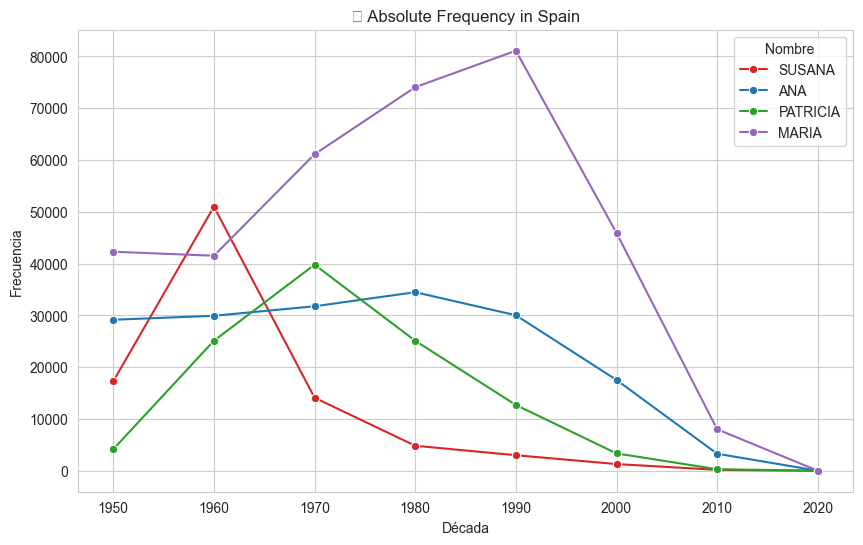

/Users/blancavg/PycharmProjects/candy-names/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


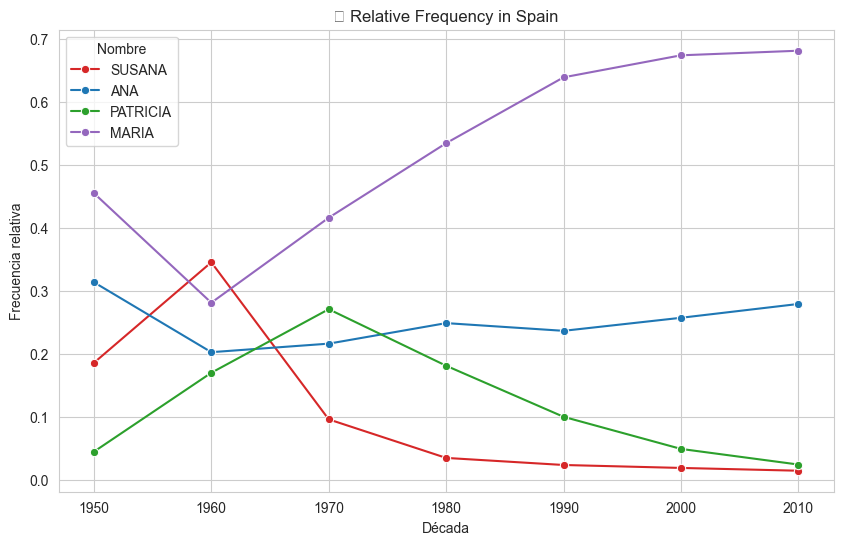

/Users/blancavg/PycharmProjects/candy-names/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


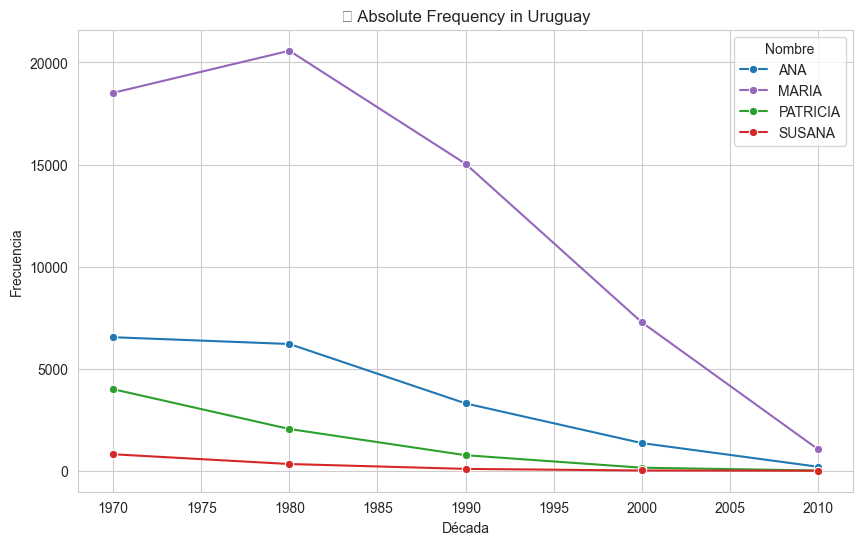

/Users/blancavg/PycharmProjects/candy-names/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


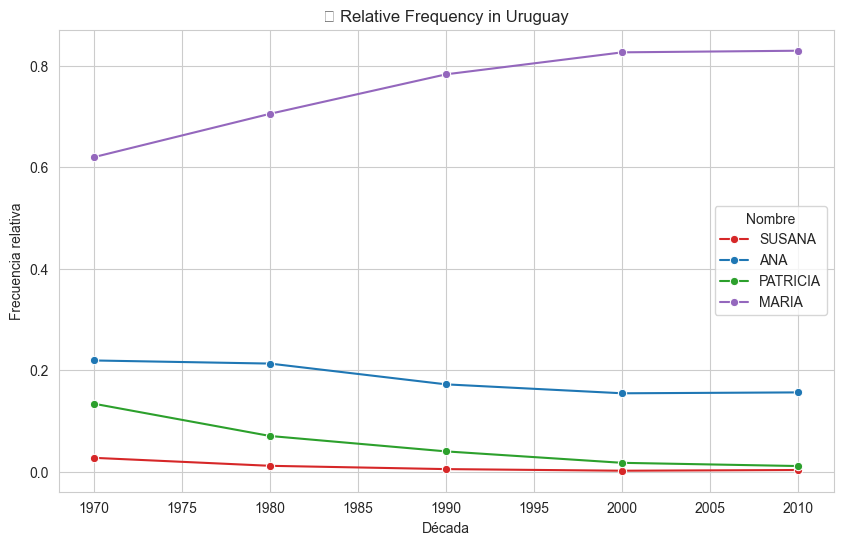

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = {'SUSANA': '#D62728', 'ANA': '#1F77B4', 'PATRICIA': '#2CA02C', 'MARIA': '#9467BD'}

def plot_line(df, y_label, title):
    df_melt = df.melt(id_vars='Década', var_name='Nombre', value_name=y_label)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_melt, x='Década', y=y_label, hue='Nombre', palette=palette, marker='o')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_line(esp_abs, "Frecuencia", "📊 Absolute Frequency in Spain")
plot_line(esp_rel, "Frecuencia relativa", "📈 Relative Frequency in Spain")
plot_line(uru_abs, "Frecuencia", "📊 Absolute Frequency in Uruguay")
plot_line(uru_rel, "Frecuencia relativa", "📈 Relative Frequency in Uruguay")

## 🧪 Statistical Test: Chi-squared

In [8]:
from scipy.stats import chi2_contingency

df_chi = esp_abs[esp_abs['Década'].between(1970, 2010)][['Década', 'SUSANA', 'PATRICIA']]
chi_data = df_chi.set_index('Década').T.values

stat, p, dof, expected = chi2_contingency(chi_data)

print("Chi-squared statistic:", round(stat, 2))
print("p-value:", p)
if p < 0.05:
    print("✅ Statistically significant difference in decline between Susana and Patricia.")
else:
    print("❌ No significant difference detected.")

Chi-squared statistic: 1357.46
p-value: 1.1582309798229652e-292
✅ Statistically significant difference in decline between Susana and Patricia.


## 🧾 Conclusion
- In Spain, *Susana* shows a sharp drop starting in the 1980s, coinciding with *Candy Candy's* release.
- In Uruguay (without the same media exposure), the drop exists but is more gradual.
- The chi-squared test confirms the decline of *Susana* is statistically significant when compared to *Patricia*.
- This suggests cultural media may have influenced name selection in ways that are subtle—but detectable.